In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, binom, poisson, geom, expon
from math import sqrt

from scipy.stats import ttest_ind,f_oneway,chisquare,chi2_contingency,kruskal


In [2]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
data=pd.read_csv("bike_sharing.txt")

In [4]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 1. Define Problem Statement and perform Exploratory Data Analysis
    a. Definition of problem (as per given problem statement with additional views)
    b. Observations on shape of data, data types of all the attributes, conversion of
    categorical attributes to 'category' (If required) , missing value detection,
    statistical summary.
    c. Univariate Analysis (distribution plots of all the continuous variable(s)
    barplots/countplots of all the categorical variables)
    d. Bivariate Analysis (Relationships between important variables such as workday
    and count, season and count, weather and count.
    e. Illustrate the insights based on EDA
    i. Comments on range of attributes, outliers of various attributes
    ii. Comments on the distribution of the variables and relationship between
    them
    iii. Comments for each univariate and bivariate plot

Problem Statement :
> As stated, Yulu has recently suffered considerable dips in their revenues. The provided dataset has factors like season, holiday and weather related details for the count of users of the bike. We need to analyze the data based on certain factors like,
> - usage count affected by season
> - usage count affected by holiday
> - usage count affected by weather factors, and so on.

In [5]:
data.shape

(10886, 12)

> The dataset has 12 columns/attributes and have total of 10886 number of records, which is considerably low and population data can be used for all the analysis.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


> From above code, we can observe that data type is correctly labelled. Also, there is no null data in the provided dataset.
> Also, in the provided data, there is no need to explicity convert categorical to numerical data as all required data are in integer or float format.

In [7]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


> The above overall summary doesn't give any meaningful insights for any features except count because it doesn't show the dependency of these features to have the usage count. We need to do comparitive analysis. For count column, we can infer that :
> - The minimum count of usage was 1 and the max value is 977, with mean value around 192 usage every hour.
> - The standard deviation is as high as 181 usage for an hour.
> - For 50% of all 1-hour, the usage count has been around 145.

In [8]:
data[['season']].value_counts()

season
4         2734
2         2733
3         2733
1         2686
dtype: int64

> Number of use records is pretty much same for different seasons. So, we cannot directly infer something from it and we need to do some computations.

<AxesSubplot:xlabel='count', ylabel='Count'>

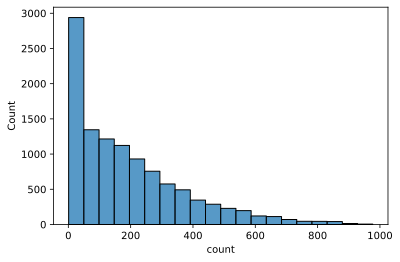

In [9]:
sns.histplot(data['count'],bins=20)

> We can't predict much for the usage based on daily data as it the very much left skewed, That means, in the data provided, for most of the days, the usage count in low.

In [10]:
data_season=data.groupby('season').sum()[['casual','registered','count']].reset_index()
data_season

,season,casual,registered,count
0,1,41605,270893,312498
1,2,129672,458610,588282
2,3,142718,497944,640662
3,4,78140,465894,544034


> In the above code, we have grouped the data based on season and have taken the sum to get the total number of users for different seasons.

<AxesSubplot:xlabel='season', ylabel='count'>

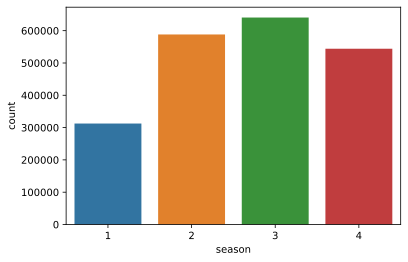

In [11]:
sns.barplot(data=data_season,x='season',y='count')

> As we can see, season 3, which is fall, has more number of usage count and season 1, which is spring has low number of usage count. However, we cannot generate too many of dependency based on the season from this data. So, we may need to do some complex computation analysis like hypothesis testing.

<AxesSubplot:xlabel='weather', ylabel='count'>

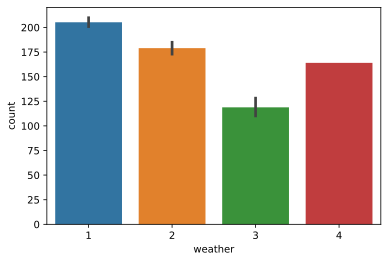

In [12]:
sns.barplot(data=data,y='count',x='weather')

> Above is the count of number of users data for each weather, and although weather 3 as low data but all oothers are mostly same.
> Let us do some analysis based on sum of count for total number of users for each weather.

In [13]:
data_weather=data.groupby('weather').sum()[['casual','registered','count']].reset_index()
data_weather

,weather,casual,registered,count
0,1,289900,1186163,1476063
1,2,87246,419914,507160
2,3,14983,87106,102089
3,4,6,158,164


<AxesSubplot:xlabel='weather', ylabel='count'>

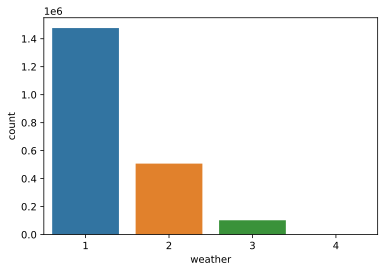

In [14]:
sns.barplot(data=data_weather,x='weather',y='count')

> In the above chart, it is evident that weather 1, which is clear weather, has most number of users and weather 4, which is Heacy rain, has the least or very much close to 0. However, we can do the statistical analysis to support our hypothesis.

<AxesSubplot:xlabel='workingday', ylabel='count'>

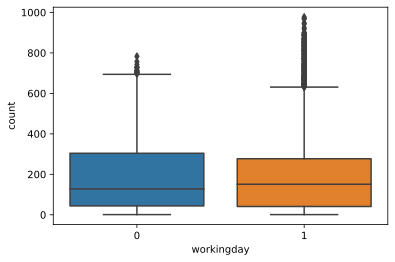

In [15]:
sns.boxplot(data=data, y= 'count',x='workingday')

> In the above chart, we can see that the mean difference between the count of users data based on working day is very much same. However, working day = 1 data has more outliers compared to working day = 0.

In [16]:
data_workingday=data.groupby('workingday').sum()[['casual','registered','count']].reset_index()
data_workingday

,workingday,casual,registered,count
0,0,206037,448835,654872
1,1,186098,1244506,1430604


<AxesSubplot:xlabel='workingday', ylabel='count'>

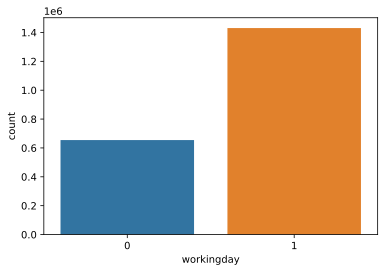

In [17]:
sns.barplot(data=data_workingday,x='workingday',y='count')

> While grouping the data based on working day and taking the sum of overall count of users, more users tend to use on working day. However, we need to perform statistical analysis to support our hypothesis.

<AxesSubplot:>

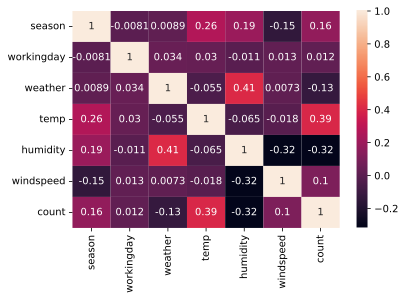

In [18]:
sns.heatmap(data[['season','workingday','weather','temp','humidity','windspeed','count']].corr(),annot=True)

> If we see the correlation matrix above, other than temperature & humidity, the relation between other factors such as seson, weather, workingday to the count of users look very low.

## Hypothesis Testing :
### a. 2- Sample T-Test to check if Working Day has effect on number of electric cycles rented

<AxesSubplot:xlabel='workingday', ylabel='count'>

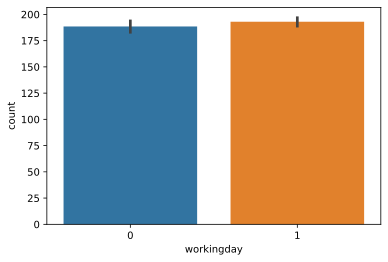

In [19]:
sns.barplot(data=data, x='workingday',y='count')

> The count for weatherday 2 type values look to have similar count. Let us do the statistical analysis to confirm the dependency.

In [20]:
# H0 -> defined as Working day(W = 0 or 1) has no effect on electric cycles rented(R)
# H1 -> defined as Working day has effect on electric cycles rented

# H0 : R0 = R1
# H1 : R0 != R1

# Test : 2 sample test

# Test type : Two-tailed test

# Next step will be computing p-value, and assuming alpha = 0.05 for confidence level 95%

In [21]:
data['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [22]:
# In the above code, we see that workingday=0 data has lower count than workingday=1. 
# Hence, to eliminate the chance of variance-bias,we take same number of sample size for both type.

data_w0=data.loc[data['workingday']==0]['count']
data_w1=data.loc[data['workingday']==1]['count'].sample(3474)

In [23]:
alpha = 0.05
test_stat, p_value = ttest_ind(data_w1, data_w0) # 2-tailed test
print("Test stat: ", test_stat)
print("p-value: ", p_value)

if p_value < alpha:
    print("Null rejected")
else :
    print("Fail to reject the Null")

Test stat:  1.2796511585338466
p-value:  0.20071058898075958
Fail to reject the Null


> Conclusion :
> - Based on the t-test conducted, p-value is higher than the alpha value. So, we fail to reject the null hypothesis.
> - So, the count for the users may be same for both values for workingday 0 and 1.

### b. ANOVA to check if No. of cycles rented similar or different in different
    1. weather
    2. season

<AxesSubplot:xlabel='weather', ylabel='count'>

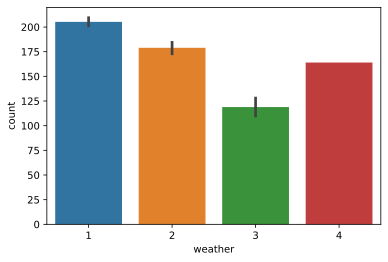

In [24]:
sns.barplot(data=data, x='weather',y='count')

> The count for all weather except 3 looks to have similar count. Let us do the statistical analysis to confirm the dependency.

In [25]:
# H0 -> defined as weather(w= 1,2,3 or 4) has no effect on electric cycles rented(R)
# H1 -> defined as weather has effect on electric cycles rented

# H0 : R1 = R2 = R3 = R4
# H1 : Not all are same

# Test : Anova

# Test type : 1-way anova

# Next step will be computing p-value, and assuming alpha = 0.05 for confidence level 95%

In [26]:
data['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

> weather = 4 (Heavy Rain + others) has least count, close to zero. So, we can ignore this value for our analysis.

In [27]:
w1=data.loc[data['weather']==1]['count'].sample(859)
w2=data.loc[data['weather']==2]['count'].sample(859)
w3=data.loc[data['weather']==3]['count'].sample(859)

In [28]:
# Assumptions :
#  1. Normality – that each sample is taken from a normally distributed population (Gaussian)
#  2. Independence - each sample is drawn independently of the other samples
#  3. Equal variance of data in different groups

In [1]:
sns.distplot(data['count'],bins=20)

NameError: name 'sns' is not defined

In [30]:
w1.var(), w2.var(), w3.var()

(36135.818249658725, 32253.520793137766, 19204.775892714195)

> - From the above distplot, we can say that data is NOT normally distributed.
> - Collected data is from every hour collected separately. So, they are independent.
> - variance are not same for these 3 weather values.

> So, we can say that the assumptions are not met.

In [31]:
# Let us use Kruskal test to perform statistical analysis on weather for count values.

alpha = 0.05
kruskal_stat, p_value = kruskal(w1, w2, w3)
print("kruskal_stat: ", kruskal_stat)
print("p-value: ", p_value)

if p_value < alpha:
    print("Null rejected")
else :
    print("Fail to reject the Null")

kruskal_stat:  117.42723878189219
p-value:  3.1695607920906466e-26
Null rejected


> Conclusion :
> - Based on the kruskal test conducted, p-value is lower than the alpha value. So, reject the null hypothesis.
> - So, there is dependency of weather on count of users for the bicycle.

In [32]:
# Although our assumptions failed, still let us calculate using 1-way anova test

alpha = 0.05
f_stat, p_value = f_oneway(w1, w2, w3)
print("F-stat: ", f_stat)
print("p-value: ", p_value)

if p_value < alpha:
    print("Null rejected")
else :
    print("Fail to reject the Null")

F-stat:  58.88565985367163
p-value:  9.864621914463393e-26
Null rejected


> Using anova as well, we can say that the count of users has the dependency on weather for the bicycle.

<AxesSubplot:xlabel='season', ylabel='count'>

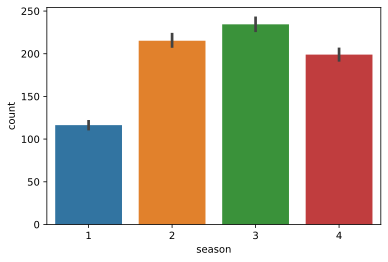

In [33]:
sns.barplot(data=data, x='season',y='count')

> The count for all weather except 3 looks to have different count. Let us do the statistical analysis to confirm the dependency.

In [34]:
# FOR SEASON

# H0 -> defined as season(w= 1,2,3 or 4) has no effect on electric cycles rented(R)
# H1 -> defined as season has effect on electric cycles rented

# H0 : R1 = R2 = R3 = R4
# H1 : Not all are same

# Test : Anova

# Test type : 1-way anova

# Next step will be computing p-value, and assuming alpha = 0.05 for confidence level 95%

In [35]:
data['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [36]:
s1=data.loc[data['season']==1]['count'].sample(2686)
s2=data.loc[data['season']==2]['count'].sample(2686)
s3=data.loc[data['season']==3]['count'].sample(2686)
s4=data.loc[data['season']==4]['count'].sample(2686)

In [37]:
s1.var(), s2.var(), s3.var(), s4.var()

(15693.568533717138, 36769.020891830354, 38810.64147458856, 31605.191846958624)

In [38]:
# Here as well, assumptions fail to verify.
# So, we use kruskal test for statistical analysis

In [39]:
alpha = 0.05
kruskal_stat, p_value = kruskal(s1, s2, s3, s4)
print("kruskal_stat: ", kruskal_stat)
print("p-value: ", p_value)

if p_value < alpha:
    print("Null rejected")

kruskal_stat:  697.3969276420513
p-value:  7.699859369925388e-151
Null rejected


> Conclusion :
> - Based on the kruskal test conducted, p-value is lower than the alpha value. So, reject the null hypothesis.
> - So, there is dependency of season on count of users for the bicycle.

In [40]:
# Although our assumptions failed, still let us calculate using 1-way anova test

alpha = 0.05
f_stat, p_value = f_oneway(s1, s2, s3, s4)
print("F-stat: ", f_stat)
print("p-value: ", p_value)

if p_value < alpha:
    print("Null rejected")

F-stat:  236.45600875844943
p-value:  1.4137780451453997e-148
Null rejected


> Using anova as well, we can say that the count of users has the dependency on season for the bicycle.

### c. Chi-square test to check if Weather is dependent on season

<AxesSubplot:>

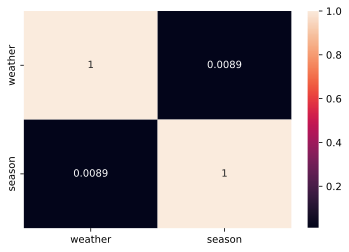

In [41]:
sns.heatmap(data[['weather','season']].corr(),annot=True)

> According the the heatmap between weather and season, the value is too low to be concluded if there is any dependency. However, these are categorical values but the heatmap is based on the mapped numerical values. So, let us perform statistical analysis to validate the dependency.

In [42]:
# H0 -> defined as weather is not dependent on season
# H1 -> defined as weather is dependent on weather

# Test : chi-square

# Next step will be computing p-value, and assuming alpha = 0.05 for confidence level 95%

In [43]:
observed=pd.crosstab(data['weather'],data['season'])
observed

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [44]:
alpha = 0.05
chi_test,p_value,df,exp_freq=chi2_contingency(observed)
print("chi_test: ", chi_test)
print("p-value: ", p_value)

if p_value < alpha:
    print("Null rejected")

chi_test:  49.15865559689363
p-value:  1.5499250736864862e-07
Null rejected


> Conclusion :
> - Based on the chi-square test conducted, p-value is lower than the alpha value. So, reject the null hypothesis.
> - So, there is weather and season are dependent.